<a href="https://colab.research.google.com/github/choinkyo/Data-Mining-Machine-Learning-Projects/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Richards, Master. William Rowe",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
# Identify column with missing data
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Number of records with missing value for each column.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# Impute the missing values in the columns: Age, Cabin, Embarked. 

# Missing values of column Age filled with mean of that column.
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean())
# Missing values of column Cabin filled with constant value "other"
titanic["Cabin"]=titanic["Cabin"].fillna("other") 
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
# Find missing values in Embarked column. 
titanic["Embarked"].loc[60:63],titanic["Embarked"].loc[826:831] 

(60      C
 61    NaN
 62      S
 63      S
 Name: Embarked, dtype: object, 826      S
 827      C
 828      Q
 829    NaN
 830      C
 831      S
 Name: Embarked, dtype: object)

In [ ]:
# Missing values of column Embarked filled with mode of that column.
print(titanic["Embarked"].mode())

0    S
dtype: object


In [ ]:
# Missing values of column Embarked filled with mode of that column.
titanic["Embarked"]=titanic["Embarked"].fillna("S")
titanic["Embarked"].loc[60:63],titanic["Embarked"].loc[826:831] 

(60    C
 61    S
 62    S
 63    S
 Name: Embarked, dtype: object, 826    S
 827    C
 828    Q
 829    S
 830    C
 831    S
 Name: Embarked, dtype: object)

In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# Sort by Fare.
sort_by_fare_1=titanic.loc[:, ['Fare', 'Name']]
sort_by_fare_2=sort_by_fare_1.sort_values('Fare', ascending=False)
display(sort_by_fare_2.head(16))

,Fare,Name
258,512.3292,"Ward, Miss. Anna"
737,512.3292,"Lesurer, Mr. Gustave J"
679,512.3292,"Cardeza, Mr. Thomas Drake Martinez"
88,263.0000,"Fortune, Miss. Mabel Helen"
27,263.0000,"Fortune, Mr. Charles Alexander"
341,263.0000,"Fortune, Miss. Alice Elizabeth"
438,263.0000,"Fortune, Mr. Mark"
311,262.3750,"Ryerson, Miss. Emily Borie"
742,262.3750,"Ryerson, Miss. Susan Parker ""Suzette"""
118,247.5208,"Baxter, Mr. Quigg Edmond"


In [ ]:
# Sort by Fare.
sort_by_fare_1=titanic.loc[:, ['Fare', 'Name']]
sort_by_fare_1.sort_values('Fare', ascending=False).iloc[15].Name

'Farthing, Mr. John'

### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# Sort by female survivals.
female_survival = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1), :]

In [ ]:
# Sort by fare.
female_survival_1= female_survival.sort_values('Fare', ascending=False)
female_survival_1.loc[:, ['Fare','Name']].iloc[5]

Fare                                            247.521
Name    Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Name: 299, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
#pivot_table
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Summary: **Female** survival rate is **higher** than male survival rate. **Pclass1** survival rate is **the** **highest** rate among three classes. 

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

0    549
1    342
Name: Survived, dtype: int64


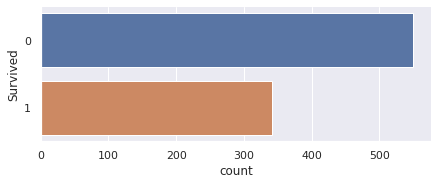

In [ ]:
print(titanic['Survived'].value_counts())
ax = sns.catplot(y='Survived', kind='count', data=titanic, height=2.5, aspect=2.5, orient='h')

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

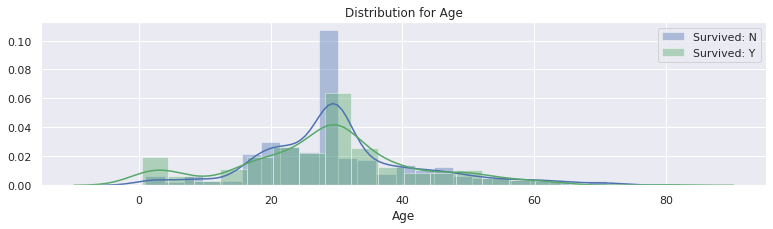

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

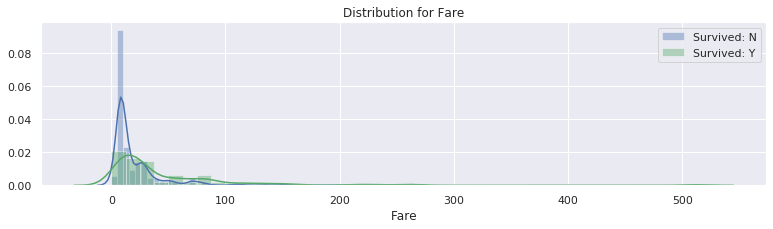

In [ ]:
def distplot(feature, frame):
    plt.figure(figsize=(13,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Survived: N')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Y')
    plt.legend()
    plt.show()

display(titanic['Age'].describe())
distplot('Age', titanic)

display(titanic['Fare'].describe())
distplot('Fare', titanic)


### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

## SibSp rate

In [ ]:
titanic.pivot_table('Survived', columns='SibSp')

SibSp,0,1,2,3,4,5,8
Survived,0.345395,0.535885,0.464286,0.25,0.166667,0.0,0.0


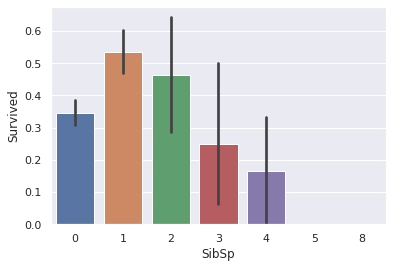

In [ ]:
#SibSp Survival Rate
sns.barplot(x="SibSp", y="Survived", data=titanic)

## Parch rate

In [ ]:
titanic.pivot_table('Survived', columns='Parch')

Parch,0,1,2,3,4,5,6
Survived,0.343658,0.550847,0.5,0.6,0.0,0.2,0.0


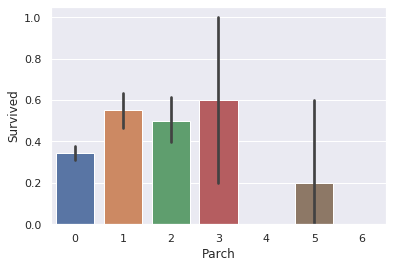

In [ ]:
#Parch Survival Rate
sns.barplot(x="Parch", y="Survived", data=titanic)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091
Name,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Sex,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569
Age,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308
SibSp,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683
Parch,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059
Ticket,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655
Fare,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726
Cabin,0.187437,0.241918,0.082104,0.163002,-0.108709,-0.002761,0.212438,0.379659,1.000000,0.017685
Embarked,-0.168091,-0.030467,0.116569,-0.133308,-0.030683,-0.085059,-0.024655,0.076726,0.017685,1.000000


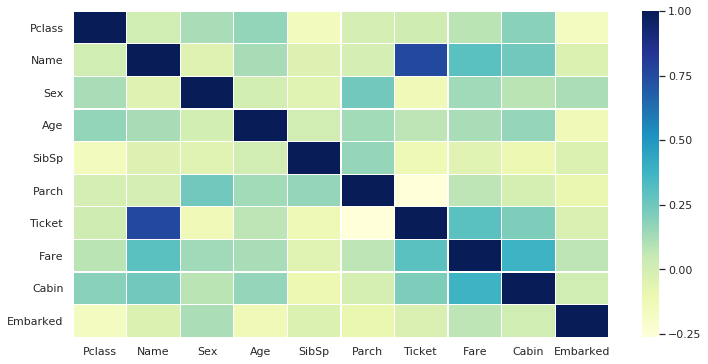

In [ ]:
# Heatmap
plt.figure(figsize=(12, 6))
corr = titanic[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

## Summarize your Findings: 
- Almost 75% of correlation between Name and Ticket. 
- Almost 50% of correlation between Fare and Cabin. 
- Almost 25% of correlation between Fare and Ticket.  

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

## Summary of Analysis: 
- Using sort_values() function, 16th most expensive ticket price is $ 221.77, and Farthering, Mr. John is the person who bought the ticket. 

- Using the loc() function and sort_value() function, female who bought 6th most expensive ticket was Name    Baxter, Mrs. James (Helene DeLaudeniere Chaput), and her fare was $247.52. 

- Based on survival rate using pivot_table(), overall survival rate for female is higher than that of male. The survival rate for Pclass 1 is the highest among the three Pclasses.

- According to Catplot(), overall un-survived rate is higher than overall survival rate. 

- According to distplot(), Age group 30’s showed both high survived rate and un-survived rate. Age group 20’s has similar survived and un-survived rate. Also the age group under 10 has 3nd highest survival rate while its un-survived rate is one of the lowest among other age groups.  Age is an important factor to one’s chance of survival. Another important factor to one’s chance of survival is Fare. People with the lowest fare shows the highest un-survived rate.   
  
- Based on barplot(), the survival rate of siblings/spouses (SibSp) is the highest when there is only one SibSp, and the lowest when there is 4 SibSp. The survival rate of Parents/Child (Parch) is the highest when there is 3 Parch, and the lowest when there is 5 Parch. 

- According to Heatmap, there are more than 75% of correlation between Name and Ticket. Almost 50% of correlation between Fare and Cabin, and 25% of correlation between Fare and Ticket. 
